In [47]:
# import libraries
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
from matplotlib.patches import Patch
import seaborn as sns

from scipy.stats import norm, zscore

#turn off warnings
import warnings
warnings.filterwarnings("ignore")

## Part 1. Data Cleaning ##

In [48]:
# loading the data

df = pd.read_excel('Census-mod.xlsx')

df.head(n=10)

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,income
0,25,Private,226802,11th,7,Never-married,Machine-op-inspct,Own-child,Black,Male,0,0,40,United-States,<=50K
1,38,Private,89814,HS-grad,9,Married-civ-spouse,Farming-fishing,Husband,White,Male,0,0,50,United-States,<=50K
2,28,Local-gov,336951,Assoc-acdm,12,Married-civ-spouse,Protective-serv,Husband,White,Male,0,0,40,United-States,>50K
3,44,Private,160323,Some-college,10,Married-civ-spouse,Machine-op-inspct,Husband,Black,Male,7688,0,40,United-States,>50K
4,18,?,103497,Some-college,10,Never-married,?,Own-child,White,Female,0,0,30,United-States,<=50K
5,34,Private,198693,10th,6,Never-married,Other-service,Not-in-family,White,Male,0,0,30,United-States,<=50K
6,29,?,227026,HS-grad,9,Never-married,?,Unmarried,Black,Male,0,0,40,United-States,<=50K
7,63,Self-emp-not-inc,104626,Prof-school,15,Married-civ-spouse,Prof-specialty,Husband,White,Male,3103,0,32,United-States,>50K
8,24,Private,369667,Some-college,10,Never-married,Other-service,Unmarried,White,Female,0,0,40,United-States,<=50K
9,55,Private,104996,7th-8th,4,Married-civ-spouse,Craft-repair,Husband,White,Male,0,0,10,United-States,<=50K


In [49]:
# Examining data types of each column
df.dtypes

age                int64
workclass         object
fnlwgt             int64
education         object
education-num      int64
marital-status    object
occupation        object
relationship      object
race              object
sex               object
capital-gain       int64
capital-loss       int64
hours-per-week     int64
native-country    object
income            object
dtype: object

In [50]:
# Show how many rows and columns this dataset has

print("Number of rows : ", df.shape[0])
 
# Obtaining the number of columns
print("Number of columns : ", df.shape[1])

Number of rows :  48870
Number of columns :  15


### 1.1. Convert Columns to Correct Data Type ###

In [51]:
# Convert the categorical columns to a categorical datatype without numeric encoding
cat_columns = ['workclass', 'education', 'marital-status', 'occupation', 'relationship', 'race', 'sex', 'native-country', 'income']
for column in cat_columns:
    df[column] = df[column].astype('category')

# Verify the change by displaying the datatypes again
df.dtypes

age                  int64
workclass         category
fnlwgt               int64
education         category
education-num        int64
marital-status    category
occupation        category
relationship      category
race              category
sex               category
capital-gain         int64
capital-loss         int64
hours-per-week       int64
native-country    category
income            category
dtype: object

### 1.2. Removal of Duplicates ###

In [52]:
# Tabulate and identify if there any duplicate records (not duplicate cells) in which case you need to remove them. 
# Identify these duplicates in your report. 

pd.DataFrame(df)
duplicate_records = df[df.duplicated(keep=False)]

if not duplicate_records.empty:
    print("\nDuplicate Records:")
else:
    print("\nNo Duplicate Records Found.")

display(duplicate_records)


Duplicate Records:


,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,income
18,37,Private,60548,HS-grad,9,Widowed,Machine-op-inspct,Unmarried,White,Female,0,0,20,United-States,<=50K
19,37,Private,60548,HS-grad,9,Widowed,Machine-op-inspct,Unmarried,White,Female,0,0,20,United-States,<=50K
168,42,Private,190910,HS-grad,9,Married-civ-spouse,Craft-repair,Husband,White,Male,0,0,45,United-States,<=50K
169,42,Private,190910,HS-grad,9,Married-civ-spouse,Craft-repair,Husband,White,Male,0,0,45,United-States,<=50K
342,29,Private,39257,HS-grad,9,Married-civ-spouse,Transport-moving,Husband,White,Male,0,0,40,United-States,>50K
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
48711,35,Private,379959,HS-grad,9,Divorced,Other-service,Not-in-family,White,Female,0,0,40,United-States,<=50K
48860,32,Private,116138,Masters,14,Never-married,Tech-support,Not-in-family,Asian-Pac-Islander,Male,0,0,11,Taiwan,<=50K
48861,32,Private,116138,Masters,14,Never-married,Tech-support,Not-in-family,Asian-Pac-Islander,Male,0,0,11,Taiwan,<=50K
48865,40,Private,154374,HS-grad,9,Married-civ-spouse,Machine-op-inspct,Husband,White,Male,0,0,40,United-States,>50K


In [53]:
# Remove duplicated records

census = df.drop_duplicates(keep='first')

print("\nDataFrame after removing duplicates:")
display(census)


DataFrame after removing duplicates:


,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,income
0,25,Private,226802,11th,7,Never-married,Machine-op-inspct,Own-child,Black,Male,0,0,40,United-States,<=50K
1,38,Private,89814,HS-grad,9,Married-civ-spouse,Farming-fishing,Husband,White,Male,0,0,50,United-States,<=50K
2,28,Local-gov,336951,Assoc-acdm,12,Married-civ-spouse,Protective-serv,Husband,White,Male,0,0,40,United-States,>50K
3,44,Private,160323,Some-college,10,Married-civ-spouse,Machine-op-inspct,Husband,Black,Male,7688,0,40,United-States,>50K
4,18,?,103497,Some-college,10,Never-married,?,Own-child,White,Female,0,0,30,United-States,<=50K
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
48864,27,Private,257302,Assoc-acdm,12,Married-civ-spouse,Tech-support,Wife,White,Female,0,0,38,United-States,<=50K
48865,40,Private,154374,HS-grad,9,Married-civ-spouse,Machine-op-inspct,Husband,White,Male,0,0,40,United-States,>50K
48867,58,Private,151910,HS-grad,9,Widowed,Adm-clerical,Unmarried,White,Female,0,0,40,United-States,<=50K
48868,22,Private,201490,HS-grad,9,Never-married,Adm-clerical,Own-child,White,Male,0,0,20,United-States,<=50K


### 1.3. Fix Spelling Errors ###

In [54]:
# identifying unique values across categorical variables

cat_columns = ['workclass', 'education', 'marital-status', 'occupation', 'relationship', 'race', 'sex', 'native-country', 'income']

unique_values_list = []

# Iterate through columns of interest and populate the list with unique values and column names
for column in cat_columns:
    unique_values = sorted(census[column].unique())
    for value in unique_values:
        unique_values_list.append([column, value])

# Create a DataFrame from the list with appropriate column names
unique_values_df = pd.DataFrame(unique_values_list, columns=['Column_Name', 'Unique_Value'])

# Print the resulting DataFrame
pd.set_option('display.max_rows', None)
print("DataFrame with column names and unique values:")
display(unique_values_df)

DataFrame with column names and unique values:


,Column_Name,Unique_Value
0,workclass,?
1,workclass,Federal-gov
2,workclass,Local-gov
3,workclass,Never-worked
4,workclass,Private
5,workclass,Self-emp-inc
6,workclass,Self-emp-not-inc
7,workclass,State-gov
8,workclass,Without-pay
9,education,10th


In [55]:
# Consistency of spelling within categorical variables

# marital-status
census.loc[:, 'marital-status'] = census['marital-status'].str.replace('married-AF-spouse', 'Married-AF-spouse')

# relationship
census.loc[:, 'relationship'] = census['relationship'].str.replace('husband', 'Husband')
census.loc[:, 'relationship'] = census['relationship'].str.replace('wife', 'Wife')

# sex
census.loc[:, 'sex'] = census['sex'].str.replace('Mole', 'Male')
census.loc[:, 'sex'] = census['sex'].str.replace('Femole', 'Female')

# native-country 
census.loc[:, 'native-country'] = census['native-country'].str.replace('Hong', 'Hong-Kong')
census.loc[:, 'native-country'] = census['native-country'].str.replace('South', 'South-Korea')
census.loc[:, 'native-country'] = census['native-country'].str.replace('Holand-Netherlands', 'Holland-Netherlands')

### 1.4. Imputing Missing Data ###

Categorical variables:

In [56]:
# Missing values "?" within categorical variables

for column in cat_columns:
    census.loc[:, column] = census[column].str.replace('?', 'Others')

In [57]:
## Check data ##

cleaned_unique = []

# Iterate through columns of interest and populate the list with unique values and column names
for column in cat_columns:
    unique_values = sorted(census[column].unique())
    for value in unique_values:
        cleaned_unique.append([column, value])

# Create a DataFrame from the list with appropriate column names
unique_df = pd.DataFrame(cleaned_unique, columns=['Column_Name', 'Unique_Value'])

# Print the resulting DataFrame
pd.set_option('display.max_rows', None)
print("DataFrame with column names and unique values:")
display(unique_df)

DataFrame with column names and unique values:


,Column_Name,Unique_Value
0,workclass,Federal-gov
1,workclass,Local-gov
2,workclass,Never-worked
3,workclass,Others
4,workclass,Private
5,workclass,Self-emp-inc
6,workclass,Self-emp-not-inc
7,workclass,State-gov
8,workclass,Without-pay
9,education,10th


Numerical variables:

In [58]:
# Check for missing values in numerical columns 
num_columns = ['age', 'education-num', 'capital-gain', 'capital-loss', 'hours-per-week']

missing_values = []

# Loop through numerical columns and check for missing values (represented by 99999)
for column in num_columns:
    if (census[column] == 99999).any():
        missing_values.append(column)

missing_values

['capital-gain']

In [59]:
# Inspect missing values in capital-gain
missing = census['capital-gain'] == 99999
missing_indices = census[missing].index

# Original
census[missing]

# Suggested (to save space)
print(f"Number of rows with missing capital gain: {len(census[missing])}")

Number of rows with missing capital gain: 244


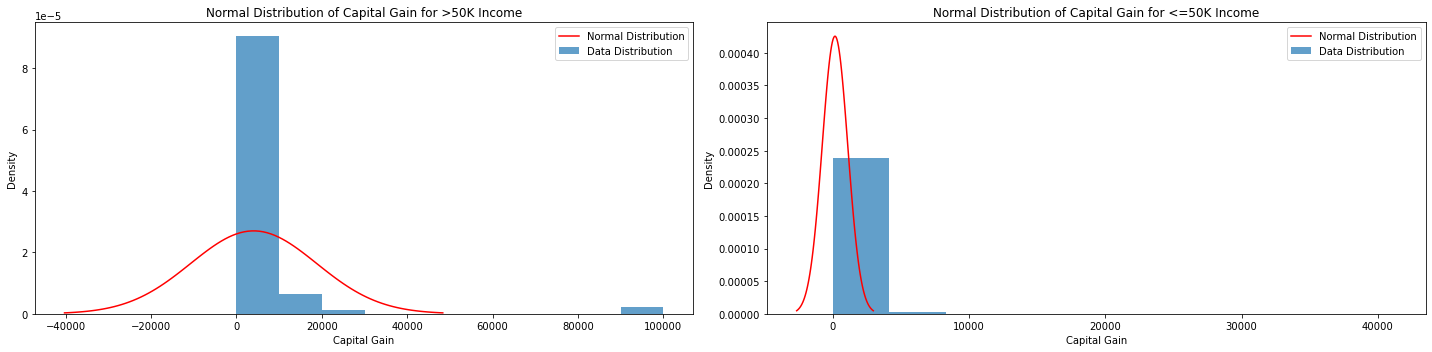

In [60]:
# Missing values within capital-gain have income >50k, examine distribution of >50k and <= 50K

income_groups = ['>50K', '<=50K']

# Create subplots to visualize the normal distribution of 'capital-gain' for each income group
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(20, 5))

for i, group in enumerate(income_groups):
    # Filter data for the current income group
    group_data = census[census['income'] == group]['capital-gain']
    
    # Calculate mean and standard deviation of 'capital-gain' for the current group
    mu, std = group_data.mean(), group_data.std()
    
    # Generate values for the x-axis
    x = np.linspace(mu - 3*std, mu + 3*std, 100)
    
    # Calculate the PDF (Probability Density Function) for the normal distribution
    pdf = norm.pdf(x, mu, std)
    
    # Plot the normal distribution curve
    axes[i].plot(x, pdf, 'r-', label='Normal Distribution')
    axes[i].hist(group_data, bins=10, density=True, alpha=0.7, label='Data Distribution')
    axes[i].set_title(f'Normal Distribution of Capital Gain for {group} Income')
    axes[i].set_xlabel('Capital Gain')
    axes[i].set_ylabel('Density')
    axes[i].legend()

# Show the plots
plt.tight_layout()
plt.show()

In [61]:
# Calculate the mean of 'capital-gain' for the income group '>50K' excluding values of 99999
mean_capgain = census[(census['income'] == '>50K') & (census['capital-gain'] != 99999)]['capital-gain'].mean()

# Replace missing values (99999) in 'capital-gain' for income group '>50K' with the calculated mean
census.loc[(census['income'] == '>50K') & (census['capital-gain'] == 99999), 'capital-gain'] = mean_capgain

(census['capital-gain'] == 99999).any()

False

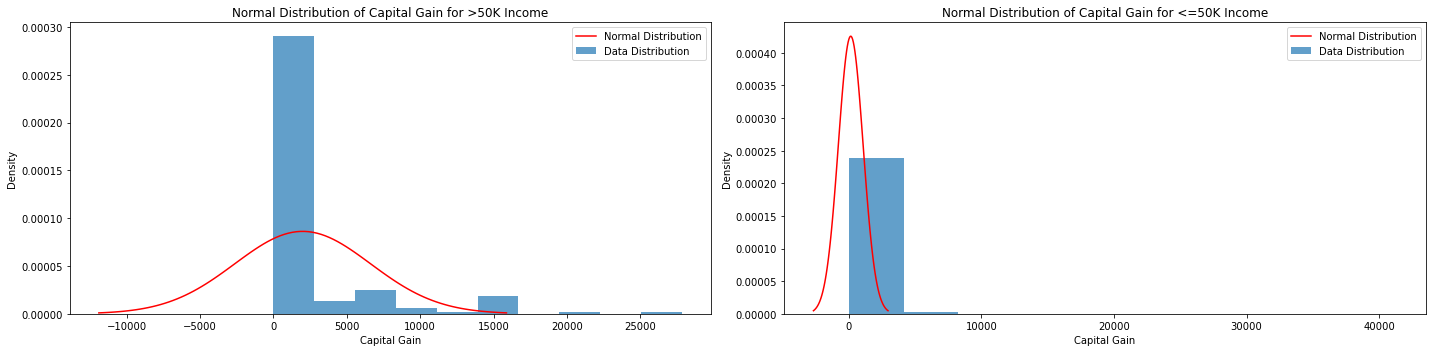

In [62]:
income_groups = ['>50K', '<=50K']

# Create subplots to visualize the normal distribution of 'capital-gain' for each income group
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(20, 5))

for i, group in enumerate(income_groups):
    # Filter data for the current income group
    group_data = census[census['income'] == group]['capital-gain']
    
    # Calculate mean and standard deviation of 'capital-gain' for the current group
    mu, std = group_data.mean(), group_data.std()
    
    # Generate values for the x-axis
    x = np.linspace(mu - 3*std, mu + 3*std, 100)
    
    # Calculate the PDF (Probability Density Function) for the normal distribution
    pdf = norm.pdf(x, mu, std)
    
    # Plot the normal distribution curve
    axes[i].plot(x, pdf, 'r-', label='Normal Distribution')
    axes[i].hist(group_data, bins=10, density=True, alpha=0.7, label='Data Distribution')
    axes[i].set_title(f'Normal Distribution of Capital Gain for {group} Income')
    axes[i].set_xlabel('Capital Gain')
    axes[i].set_ylabel('Density')
    axes[i].legend()

# Show the plots
plt.tight_layout()
plt.show()

### 2. Correlation between Variables ###

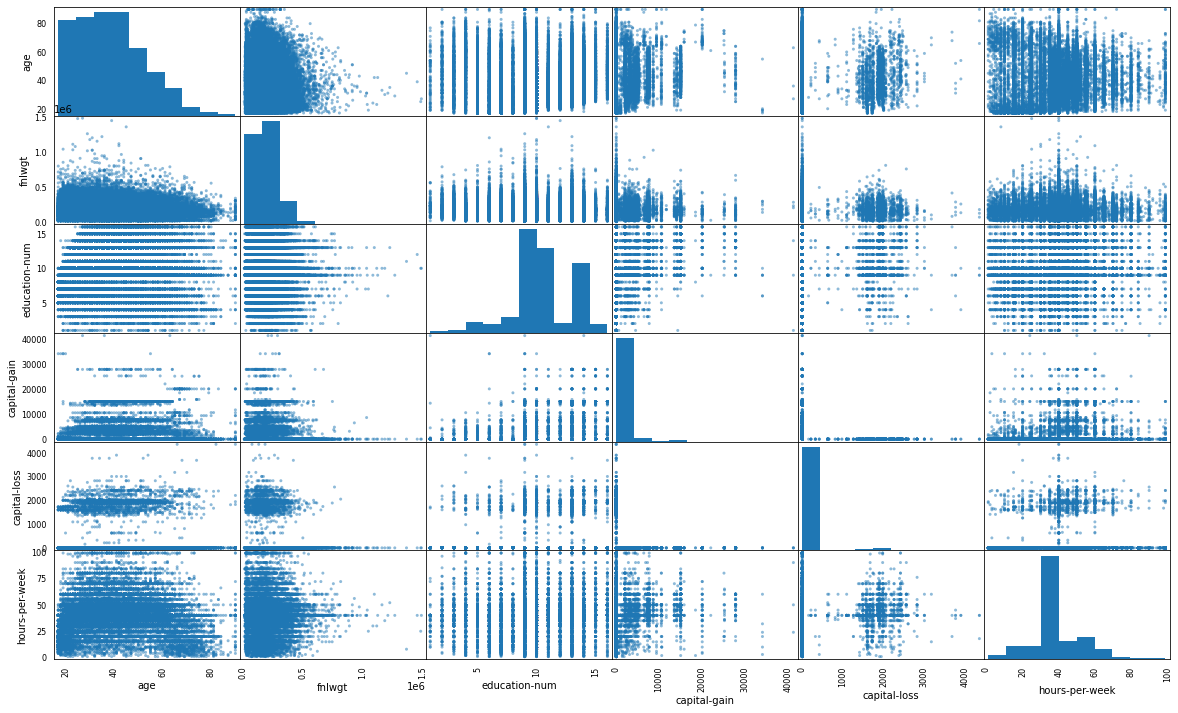

In [63]:
# Plot scatter matrix
pd.plotting.scatter_matrix(census, alpha=0.5, figsize=(20, 12), diagonal='hist')
# Turn off x and y axis ticks for all subplots for greater clarity
for ax in plt.gcf().get_axes():
    ax.tick_params(axis='both', which='both', bottom=False, top=False, left=False, right=False)

plt.show()

In [64]:
#calculate correlation
correlation_matrix = census.corr()
correlation_matrix

,age,fnlwgt,education-num,capital-gain,capital-loss,hours-per-week
age,1.000000,-0.076451,0.030635,0.114846,0.056838,0.071223
fnlwgt,-0.076451,1.000000,-0.038727,-0.003383,-0.004378,-0.013521
education-num,0.030635,-0.038727,1.000000,0.146770,0.080986,0.143915
capital-gain,0.114846,-0.003383,0.146770,1.000000,-0.050601,0.084890
capital-loss,0.056838,-0.004378,0.080986,-0.050601,1.000000,0.054431
hours-per-week,0.071223,-0.013521,0.143915,0.084890,0.054431,1.000000


Observations from the scatter matrix:  
* Most of the scatter plots do not show a clear linear relationship, suggesting that these variables are relatively independent of each other.  
* Variables like 'capital-gain' and 'capital-loss' have many 0 values, which makes sense since not everyone has capital transactions.  

Observations from the correlation matrix:  
* None of the variables have a correlation coefficient close to 1 or -1 (the highest absolute correlation coefficient is 0.147), which suggests that there is little collinearity between any two variables.
* 'age' has a slight positive correlation with 'capital-gain' and 'hours-per-week'. This means that as an individual's age increases, their capital gain and hours worked per week tend to increase slightly.  
* 'education-num' has a positive correlation with 'capital-gain' and 'hours-per-week'. This means that individuals with higher education levels may have higher capital gains and work more hours per week.  
* 'capital-gain' and 'capital-loss' have a slight negative correlation, so when one increases, the other tends to decrease.  

**Are all variables necessary for analysis?**  
Yes. As multicollinearity is not observed, all variables provide insights on and influence the target variable 'income'.

### 3. Outlier Detection

We employed outlier using seaborn's boxplot; for each variable, data points which lie above the third quartile plus 1.5 times the inter-quartile range are determined to be outliers. To better visualize the data, we normalized them using z-score. 

#### observations

From the diagram below, we observed that the outliers for capital-gain and capital-loss above the 3rd quartile, and exhibit high degrees of variability. On average, the proportion of outliers for both features is approximately 4.7%. Further analysis of the distributions revealed that these two metrics are extremely left-skewed, with most people having capital gains and losses of 0. Taken together, this suggests that most people do not invest, and that the performance of those who do vary significantly.

We also observed that the hours-per-week variable has outliers beyond both the 1st and 3rd quartiles, with a moderate level of variability - in total, they make up 7.9% of the data points. From the histogram, we also observed that the mode lies at approximately 40 hours per week and that the distribution is relatively light-tailed on both extremes. This means that while there are individuals who work significantly shorter or longer hours, working hours of the population as a whole remain rather consistent.

Lastly, there are also a large number of outliers for the age variable, but the variability is relatively smaller; the dataset consists of 8.31% outliers for age. The mean age within the population is 38.6, with a standard deviation of 13.7. The histogram displays a left-skewed distribution, indicating that there are a substantial number of young people within the population. This is a positive sign, as a left-skewed age distribution often suggests a higher proportion of individuals in their prime working years, contributing to economic productivity and vitality.

#### hypotheses
In the context of our project, those who are successful investors (i.e., high capital gains) are likely to earn more than 50,000. This is because they are likely to be financial professionals who understand the market and are trading strategically. Additionally, these investment returns also contribute towards raising their income above our threshold of 50,000. As for those who incurred significant losses, it's hard to say since it's not unheard of for professionals to make poor investment decisions at times. From another perspective, the fact that they managed to lose so much could also point towards them being high net-worth individuals who have access to risky investment opportunities. Finally, older people tend to make less than 50,000 since they are likely to have retired and are living on their savings/pension.

<AxesSubplot:>

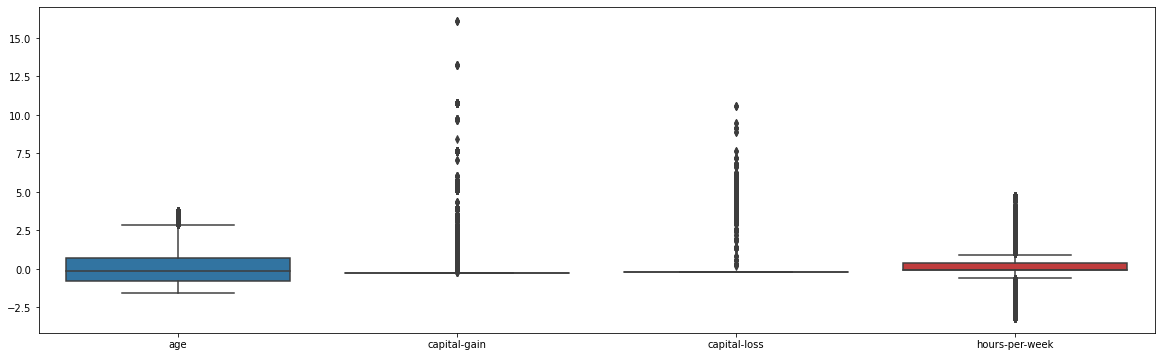

In [65]:
# Show outliers using boxplot (only for numeric variables since boxplots can only capture outliers based on standard deviation)
plt.figure(figsize=(20, 6))

# Normalize data using zscore
sns.boxplot(data=zscore(census[[i for i in num_columns if i != "education-num"]]))

In [66]:
# Generate a column for each numeric variable indicating if a row is an outlier for the given variable
# Based on |zscore| threshold of 1.5, in line with boxplot thresholds
for c in num_columns:
    zs = zscore(census[c])
    df[f"is_outlier_{c}"] =  zs > 1.5
    print(f"{len(zs[zs>1.5])} ({len(zs[zs>1.5])/len(census)*100:.2f}%) outliers for {c}")

4054 (8.31%) outliers for age
4084 (8.37%) outliers for education-num
2395 (4.91%) outliers for capital-gain
2247 (4.61%) outliers for capital-loss
3853 (7.90%) outliers for hours-per-week


As the threshold of |z-score| > 1.5 is relatively conservative, a decent number of data points have been identified as outliers.  

Observations:  
* The percentage of outliers for variables like 'age', 'education-num', and 'hours-per-week' is relatively high. However, it does not make sense to ignore these variables based solely on their outlier percentages, as they provide valuable insights into the target variable 'income'.  
* Variables like capital-gain and capital-loss inherently have a high concentration of values at 0, meaning many individuals did not have any capital transactions. The outliers in these variables might be significant events or transactions that could be of interest.  
* Some outliers may be realistic when we consider the context. For instance, while working 80 hours a week is statistically an outlier, it might be a valid data point in specific industries or professions.  

**Should any of the variables be ignored?**  
No, as the outliers percentage is high due to the nature of the variables as explained above. Additionally, the variables all provide insight to the target variable, 'income'.

### 4. Frequency/Density Distribution for Each Feature ###

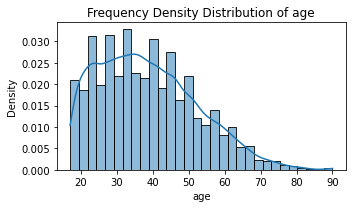

--- Central Tendency ---
Mode : 36
Median : 37.0
Mean : 38.652797704447636
--- Variation ---
Variance : 187.9227775341039
Std. Dev. : 13.708492897984952
--- Shape ---
Skewness : 0.556565210117247
Kurtosis : -0.18695466715507258


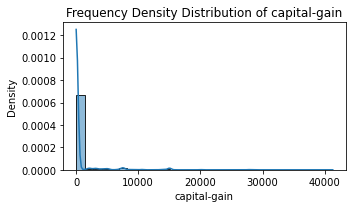

--- Central Tendency ---
Mode : 0.0
Median : 0.0
Mean : 590.1082210711056
--- Variation ---
Variance : 6418868.008676467
Std. Dev. : 2533.5485013467705
--- Shape ---
Skewness : 5.910795708931359
Kurtosis : 43.47881001539466


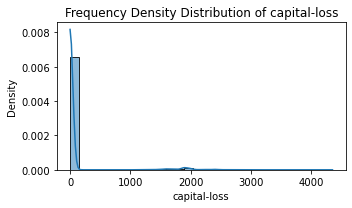

--- Central Tendency ---
Mode : 0
Median : 0.0
Mean : 87.59557286329166
--- Variation ---
Variance : 162577.60146438563
Std. Dev. : 403.20912869674174
--- Shape ---
Skewness : 4.5668965553707555
Kurtosis : 19.985756561974053


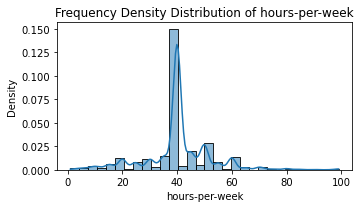

--- Central Tendency ---
Mode : 40
Median : 40.0
Mean : 40.42588645214183
--- Variation ---
Variance : 153.57973119780198
Std. Dev. : 12.392728964913337
--- Shape ---
Skewness : 0.2396443399826285
Kurtosis : 2.950394448864807


,Mode,Median,Mean,Variance,Std. Dev.,Skewness,Kurtosis
age,36.0,37.0,38.652798,1.879228e+02,13.708493,0.556565,-0.186955
capital-gain,0.0,0.0,590.108221,6.418868e+06,2533.548501,5.910796,43.478810
capital-loss,0.0,0.0,87.595573,1.625776e+05,403.209129,4.566897,19.985757
hours-per-week,40.0,40.0,40.425886,1.535797e+02,12.392729,0.239644,2.950394


In [67]:
from scipy.stats import skew, kurtosis

# Initialize a dictionary to store the computed statistics for each variable
stats_dict = {}

# Iterate over numerical columns to compute the statistics and generate the plots
for col in [i for i in num_columns if i not in ['education-num', 'fnlwgt']]:
    # Plotting the frequency/density distribution
    plt.figure(figsize=(5, 3))
    sns.histplot(census[col], stat='density', kde=True, bins=30)
    plt.title(f"Frequency Density Distribution of {col}")
    plt.ylabel('Density')
    plt.xlabel(col)
    plt.tight_layout()
    plt.show()
    
    # Calculate statistics
    stats = {}
    stats['Mode'] = census[col].mode()[0]
    stats['Median'] = census[col].median()
    stats['Mean'] = census[col].mean()
    stats['Variance'] = census[col].var()
    stats['Std. Dev.'] = census[col].std()
    stats['Skewness'] = skew(census[col])
    stats['Kurtosis'] = kurtosis(census[col])
    
    stats_dict[col] = stats
    
    # Print statistics under each graph
    print("--- Central Tendency ---")
    for key,value in list(stats.items())[:3]:
        print(key, ':', value)
        
    print("--- Variation ---")
    for key,value in list(stats.items())[3:5]:
        print(key, ':', value)
    
    print("--- Shape ---")
    for key,value in list(stats.items())[5:]:
        print(key, ':', value)    

# Print stats in a dataframe for easy comparison
stats_df = pd.DataFrame(stats_dict).T
stats_df

**Observations/Comments:**  

age  
* The graph shows the distribution of the number of individuals of a certain age.  
* There is a peak around 20-40 years.  
* The mean age is approximately 38.65 years.  
* A positive skewness of 0.557 suggests a right-skewed distribution.  * A negative kurtosis value of -0.187 suggests a light tail with  less extreme large jumps away from the mean than a normal distribution.  

education-num:  
* The graph shows the distribution of the number of individuals of a certain education level.  
* There is a peak around 9 and 13, corresponding to high school and bachelor's degrees respectively.  
* The mean education level is around 10.  
* The skewness value of -0.314 is above -0.5, which means that the distribution is fairly symmetrical.  
* A positive kurtosis value of 0.621 suggests heavy tails with more frequent large jumps away from the mean than a normal distribution.  

capital-gain:  
* The graph shows the distribution of the number of individuals of a certain capital gain.  
* There is a peak at 0, which suggests that the majority of individuals have no capital gains.  
* The mean capital gain is around 590, but the high standard deviation indicates a wide spread.  
* The high positive skewness value of 5.91 suggests a very right-skewed distribution.  
* The high positive kurtosis value of 43.5 suggests heavy tails.  

capital-loss:  
* The graph shows the distribution of the number of individuals of a certain capital loss.  
* There is a peak at 0, which suggests that the majority of individuals have no capital losses.  
* The mean capital loss is around 87.6.  
* The high positive skewness value of 5.47 suggests a very right-skewed distribution.  
* The high positive kurtosis value of 20.0 suggests heavy tails.   

hours-per-week:  
* The graph shows the distribution of the number of individuals of a certain number of working hours per week.  
* There is a significant peak at 40 hours, which aligns with the standard workweek.  
* The mean is around 40.43 hours, closely matching the mode.  
* The skewness value of 0.240 is below 0.5, which means that the distribution is fairly symmetrical.  
* The positive kurtosis value of 2.95 suggests heavy tails, with some individuals working significantly more than 40 hours.

### 5. Frequency Distribution for Each Feature by Label Classes ###

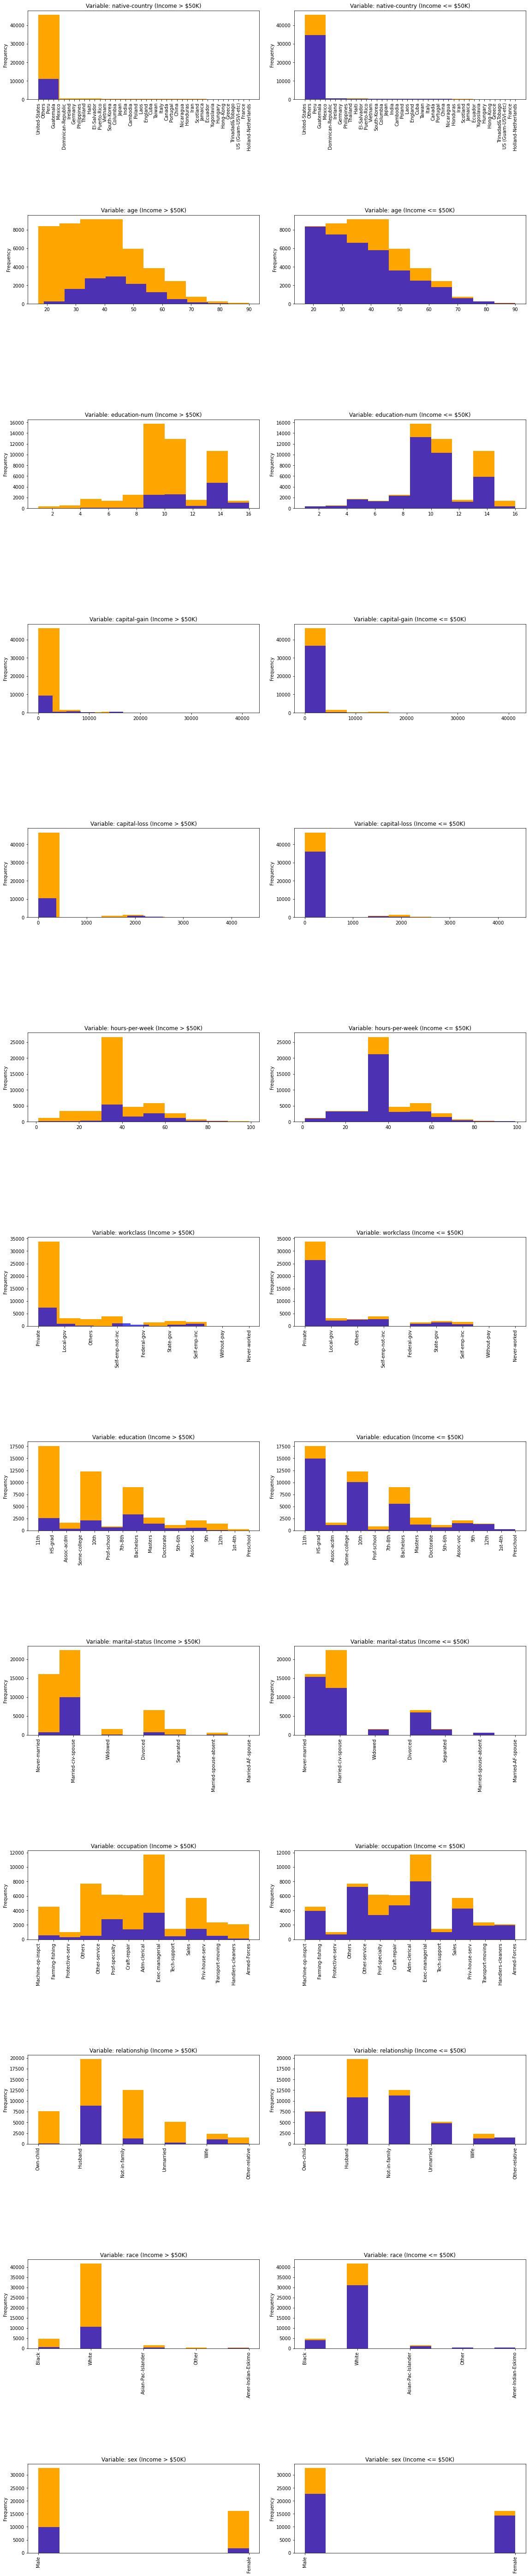

In [78]:
#separate dataframes based on y variable
gt_50 = census.loc[census["income"] == ">50K",:]
lte_50 = census.loc[census["income"] == "<=50K",:]

fig, ax = plt.subplots(13, 2, figsize = (20, 90))
all_cols = [c for c in [*num_columns, *cat_columns] if c != "income"]

for i in range(0, len(all_cols)):
    #calculate col and row number for subplot
    col_name = all_cols[i-1]

    #plot into the designated cell
    ax[i, 0].hist(census[col_name], color = "orange")
    ax[i, 0].hist(gt_50[col_name], color = "blue", alpha = 0.7)
    ax[i, 0].set_title(f"Variable: {col_name} (Income > $50K)")

    ax[i, 1].hist(census[col_name], color = "orange")
    ax[i, 1].hist(lte_50[col_name], color = "blue", alpha = 0.7)
    ax[i, 1].set_title(f"Variable: {col_name} (Income <= $50K)")

    ax[i, 0].set_ylabel("Frequency")
    ax[i, 1].set_ylabel("Frequency")

    #rotate x tick label if it's a categorical variable
    if col_name in cat_columns:
        for tick in ax[i, 0].get_xticklabels():
            tick.set_rotation(90)
        for tick in ax[i, 1].get_xticklabels():
            tick.set_rotation(90)

#set spacing
plt.subplots_adjust(left=0.1, bottom=0.1, right=0.85, top=0.95, wspace=0.15, hspace=1.3)

plt.show()

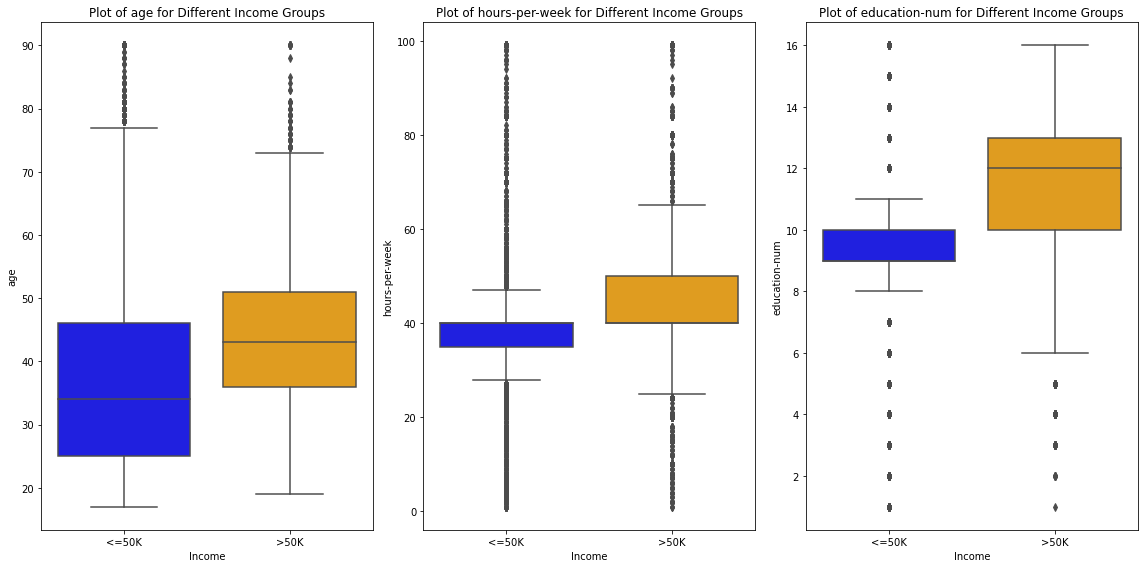

In [77]:
selected_cols = ['age', 'hours-per-week', 'education-num']


fig, ax = plt.subplots(1, len(selected_cols), figsize = (16, 8))

for i, col_name in enumerate(selected_cols):
    sns.boxplot(data=census, x='income', y=col_name, ax=ax[i], palette={"<=50K": "blue", ">50K": "orange"})    
    ax[i].set_title(f"Plot of {col_name} for Different Income Groups")
    ax[i].set_xlabel("Income")
    ax[i].set_ylabel(col_name)

plt.tight_layout()
plt.show()


**Frequency Distribution Observations:**  
The frequency distribution graphs show the distribution of the stated variable in blue, grouped by income >50K on the left and <=50K on the right.  

**<font color='red'>please help check and supplement the observations cos idk what more to say</font>**  

native-country:  
<font color='red'>idk what to say</font>  

age:  
* People earning more than 50K generally tend to be older, with the median age being higher than that of the <=50K group. This might indicate experience and seniority.  

education-num and education:  
* Higher education levels (like Bachelors, Masters, and Doctorate) have a relatively higher representation in the >50K group.  
* HS-grad and some college education dominate the <=50K group.  

capital-gain and capital-loss:  
* Most individuals with a low capital gain/loss or a capital gain/loss of 0 have income <=50K.  
* This suggests that individuals with higher income have more means to invest in capital and make capital gains/losses.  

hours-per-week:  
* Those earning more than 50K tend to work longer hours, with a notable number of individuals working more than 40 hours a week.  
* For those earning 50K or less, the majority work around 40 hours, but there is also a significant portion working less than that.  

work-class:  
* For both individuals earning >50K and <=50K, most of them fall under the private work class.  

marital-status:  
* For individuals earning >50K, most of them fall under the Married-civ-spouse status.  
* For individuals earning <=50K, most of them fall under the Never-married and Married-civ-spouse statuses.  

occupation:  
* For individuals earning >50K, most of them fall under exec-managerial roles.  
* For individuals earning <=50K, most of them fall under exec-managerial, others and sales roles.  

relationship:  
* For individuals earning >50K, most of them fall under Husband roles.  
* For individuals earning <=50K, most of them fall under Not-in-family roles.  

race:  
* The majority of individuals in both income groups are White. However, when comparing the proportions, Whites and Asians have a higher representation in the >50K group relative to their total population than other races.  

sex:  
* A significant number of males earn more than 50K compared to females. Conversely, more females earn 50K or less.  


**Box Plot Observations:**  

* For age, hours-per-week and education-num, the interquartile range is wider for the >50K group, indicating more variability. Outliers are evident, especially in the hours-per-week distribution for both income groups, suggesting some individuals work exceptionally long or short hours.  
* In summary, variables like age, education, and hours-per-week show distinct patterns between the two income groups, which could be vital predictors in modeling income. The differences in gender and race distributions suggest societal or sector-specific income disparities that might be worth exploring further.